# POITEVIN LOUIS 11410541 DS-INFO

# Import library

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

# I. Réduction de dimensions et Visualisation des données

## 1) Importer ce jeu de données avec la librairie pandas (c.f. read_csv) 

In [2]:
data = pd.read_csv('./villes.csv', sep=';')
# Temperature
Xtrain_temp = data.iloc[:, 1:13].values
# Ville
labels_ville = data.iloc[:, 0].values
data.head(20)

ville  janv  fev  mars  avril   mai  juin  juil  aout  sept   oct   nov  \
0   ajac   7.7  8.7  10.5   12.6  15.9  19.8  22.0  22.2  20.3  16.3  11.8   
1   ange   4.2  4.9   7.9   10.4  13.6  17.0  18.7  18.4  16.1  11.7   7.6   
2   ango   4.6  5.4   8.9   11.3  14.5  17.2  19.5  19.4  16.9  12.5   8.1   
3   besa   1.1  2.2   6.4    9.7  13.6  16.9  18.7  18.3  15.5  10.4   5.7   
4   biar   7.6  8.0  10.8   12.0  14.7  17.8  19.7  19.9  18.5  14.8  10.9   
5   bord   5.6  6.6  10.3   12.8  15.8  19.3  20.9  21.0  18.6  13.8   9.1   
6   bres   6.1  5.8   7.8    9.2  11.6  14.4  15.6  16.0  14.7  12.0   9.0   
7   cler   2.6  3.7   7.5   10.3  13.8  17.3  19.4  19.1  16.2  11.2   6.6   
8   dijo   1.3  2.6   6.9   10.4  14.3  17.7  19.6  19.0  15.9  10.5   5.7   
9   embr   0.5  1.6   5.7    9.0  13.0  16.4  18.9  18.3  15.3  10.1   4.6   
10  gren   1.5  3.2   7.7   10.6  14.5  17.8  20.1  19.5  16.7  11.4   6.5   
11  lill   2.4  2.9   6.0    8.9  12.4  15.3  17.1  17.1  14.7  10.4   6.1   
12  limo   3.1  3.9   7.4    9.9  13.3  16.8  18.4  17.8  15.3  10.7   6.7   
13  lyon   2.1  3.3   7.7   10.9  14.9  18.5  20.7  20.1  16.9  11.4   6.7   
14  mars   5.5  6.6  10.0   13.0  16.8  20.8  23.3  22.8  19.9  15.0  10.2   
15  mont   5.6  6.7   9.9   12.8  16.2  20.1  22.7  22.3  19.3  14.6  10.0   
16  nanc   0.8  1.6   5.5    9.2  13.3  16.5  18.3  17.7  14.7   9.4   5.2   
17  nant   5.0  5.3   8.4   10.8  13.9  17.2  18.8  18.6  16.4  12.2   8.2   
18  nice   7.5  8.5  10.8   13.3  16.7  20.1  22.7  22.5  20.3  16.0  11.5   
19  nime   5.7  6.8  10.1   13.0  16.6  20.8  23.6  22.9  19.7  14.6   9.8   

    dec  
0   8.7  
1   4.9  
2   5.3  
3   2.0  
4   8.2  
5   6.2  
6   7.0  
7   3.6  
8   2.1  
9   0.5  
10  2.3  
11  3.5  
12  3.8  
13  3.1  
14  6.9  
15  6.5  
16  1.8  
17  5.5  
18  8.2  
19  6.5

## 2) Réaliser une Analyse en Composantes Principales (module PCA de Scikit-learn) sur ce jeu de données centrées réduites (StandardScaler)

### Quel est le nombre d’axes à retenir pour conserver un minimum de 90% de l’information représentée dans le nuage initial

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_temp = scaler.fit_transform(Xtrain_temp)
Xtrain_temp = scale_temp

pca = PCA()
pca.fit(Xtrain_temp)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dimension = np.argmax(cumsum >= 0.90) + 1
print("Nombre d'axes : "+str(dimension))

Nombre d'axes : 2


### Donner une interprétation des deux premiers axes principaux.

In [4]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]


On voit que la variance des températures repose a 66% dans le premier axe et 25% dans le deuxième

In [5]:
1-sum(explained_variance)

1.1102230246251565e-16

Seulement 7% de la variance des données n'est pas capturé par les deux premiers axes

###  En suivant le code suivant, donner une visualisation graphique des villes projetées dans le plan principal

In [6]:
pca = PCA(n_components=dimension)
X_pca_temp = pca.fit_transform(Xtrain_temp)
# n-component=2 ou 0.9

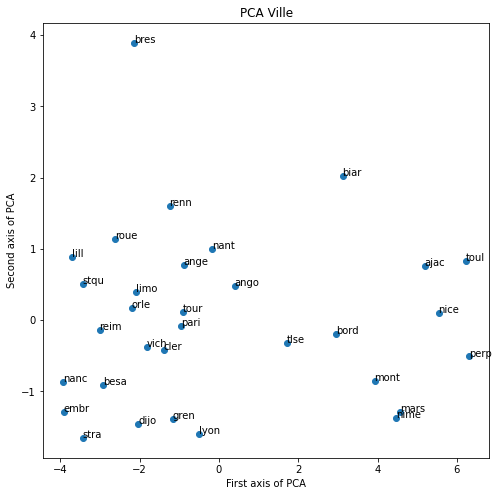

In [7]:
import matplotlib
plt.figure(figsize=(8, 8))
plt.title('PCA Ville')
plt.xlabel('First axis of PCA')
plt.ylabel('Second axis of PCA')
plt.scatter(X_pca_temp[:, 0], X_pca_temp[:, 1])
for label, x, y in zip(labels_ville, X_pca_temp[:, 0], X_pca_temp[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Comme beaucoup de mois de l'année ont une moyenne de température similaires, deux axes suffisent.
Comme nous avons centré et réduit les données, la moyenne des température se retrouvent autour de 0.

##  3) Faire de même pour le fichier "crimes.csv".

In [8]:
dfCrime = pd.read_csv('./crimes.csv', sep=';')
Xtrain_crime = dfCrime.iloc[:, 1:8].values
# Ville
labels_crime = dfCrime.iloc[:, 0].values

scaler = StandardScaler()
scale_crime = scaler.fit_transform(Xtrain_temp)
Xtrain_crime = scale_crime

In [9]:
pca = PCA(n_components=0.9)
X_pca_crime = pca.fit_transform(Xtrain_crime)

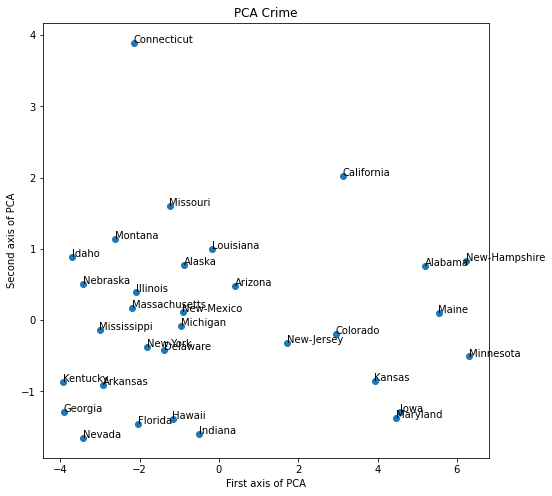

In [10]:
plt.figure(figsize=(8, 8))
plt.title('PCA Crime')
plt.xlabel('First axis of PCA')
plt.ylabel('Second axis of PCA')
plt.scatter(X_pca_crime[:, 0], X_pca_crime[:, 1])
for label, x, y in zip(labels_crime, X_pca_crime[:, 0], X_pca_crime[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

## 4) Faire de même pour le fichier "50_Startups.csv"

In [11]:
dfStartup = pd.read_csv('./50_Startups.csv', sep=';')
Xtrain_startup = dfStartup.iloc[:, 1:5].values
# Ville
labels_startup = dfStartup.iloc[:, 0].values
scaler = StandardScaler()
scale_startup = scaler.fit_transform(Xtrain_startup)
Xtrain_startup = scale_startup


In [12]:
pca = PCA(n_components=0.9)
X_pca_startup = pca.fit_transform(Xtrain_startup)

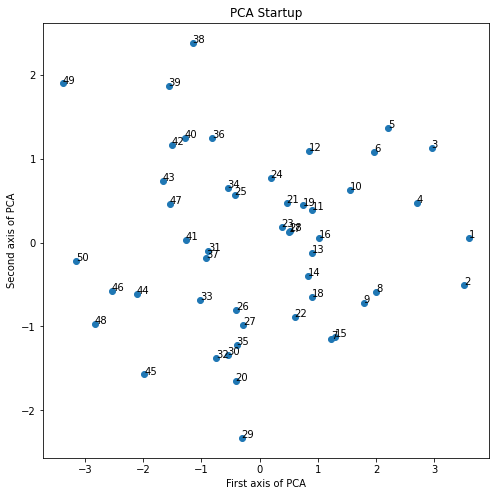

In [13]:
plt.figure(figsize=(8, 8))
plt.title('PCA Startup')
plt.xlabel('First axis of PCA')
plt.ylabel('Second axis of PCA')
plt.scatter(X_pca_startup[:, 0], X_pca_startup[:, 1])
for label, x, y in zip(labels_startup, X_pca_startup[:, 0], X_pca_startup[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# II. Clustering

# 1) Appliquez la procédure KMeans sur ce jeu de données pour obtenir 3 clusters

In [14]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k)
clustering_kmean = kmeans.fit_predict(Xtrain_temp)



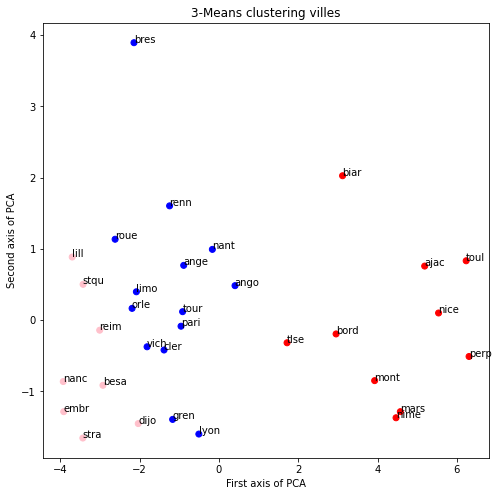

In [15]:
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(8, 8))
plt.title('3-Means clustering villes')
plt.xlabel('First axis of PCA')
plt.ylabel('Second axis of PCA')
plt.scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c= clustering_kmean, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels_ville, X_pca_temp[:, 0], X_pca_temp[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

On distingue clairement 3 groupes de villes. En rouge les villes froides,en rose les villes à température moyenne et en bleu les villes chaudes. Ceci correspond bien a la réalité des température connus en France.

## 2) Appliquez la procédure AgglomerativeClustering sur ce jeu de données pour obtenir trois clusters avec différentes méthodes d’agrégation (il faut essayer ward et average).

In [16]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 3
ac_ward = AgglomerativeClustering(n_clusters=n_cluster,linkage="ward")
clustering_ward = ac_ward.fit(Xtrain_temp)


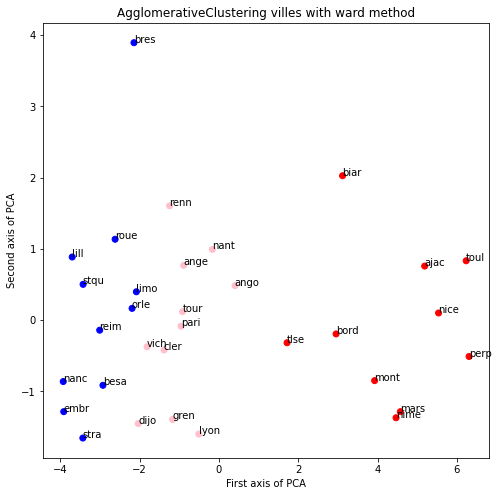

In [17]:
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(8, 8))
plt.title('AgglomerativeClustering villes with ward method')
plt.xlabel('First axis of PCA')
plt.ylabel('Second axis of PCA')
plt.scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c= clustering_ward.labels_, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels_ville, X_pca_temp[:, 0], X_pca_temp[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [18]:
ac_average = AgglomerativeClustering(n_clusters=n_cluster,linkage="average")
clustering_average = ac_average.fit(Xtrain_temp)


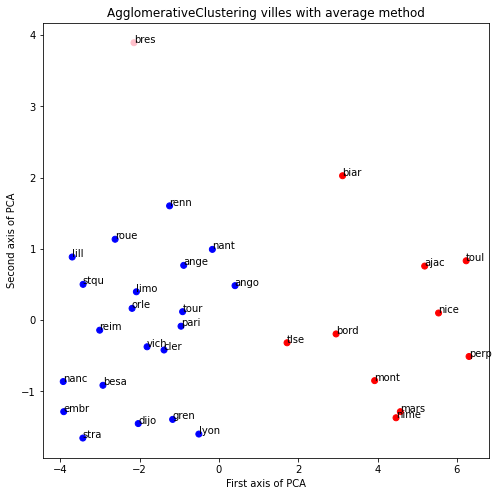

In [19]:
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(8, 8))
plt.title('AgglomerativeClustering villes with average method')
plt.xlabel('First axis of PCA')
plt.ylabel('Second axis of PCA')
plt.scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c= clustering_average.labels_, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels_ville, X_pca_temp[:, 0], X_pca_temp[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

En comparant les deux methodes de l'algorithme AgglomerativeClustering, on voit que la méthode average classe de manière plus extrème que la méthode ward. Par exemple, on observe que des villes comme Rennes, Lyon, Nantes, etc.. sont classés comme des villes froides dans la méthode average tandis que dans la méthode ward elles étaient considérées comme intermédiaires.
Bizarrement, Brest qui était classé comme ville froide dans avec ward se retrouve maintenant en ville intermédiaire dans average.

## 3) Déterminer la meilleure partition (nombre de clusters) pour la méthode KMeans

Le coefficient de silhouette est une mesure de qualité d'un ensemble de donnée en classification automatique. Pour chaque point, il fait la différence entre la distance moyenne avec les points du même groupe (cohésion) et la distance moyenne avec les points des autres groupes (séparation). Elle varie entre -1 et 1. Une valeur grande indique un bon "match" avec les données de son cluster mais un mauvais match avec les clusters du voisin. 

In [20]:
from sklearn import metrics
metrics_k_mean= dict()
for i in np.arange(2, 6):
 clustering = KMeans(n_clusters=i).fit_predict(Xtrain_temp)
 print(metrics.silhouette_score(Xtrain_temp, clustering,metric='euclidean'))
 metrics_k_mean[i] = (metrics.silhouette_score(Xtrain_temp, clustering,metric='euclidean'))
 

0.625557719180767
0.38809425947195864
0.36151471170277005
0.32518424262204665


In [21]:
import operator

metrics_k_mean
nb_cluster_optimal = max(metrics_k_mean.items(),key=operator.itemgetter(1))[0]
print(nb_cluster_optimal)

2


D'après la metric silhouette, on détermine que le nombre de partition optimale pour la méthode k-mean est de 2 clusters. 

## 4) Quelle est le meilleur algorithme à utiliser pour obtenir 3 clusters ?

On se base toujours sur la métrique silhouette

## Scoring avec l'algorithme K-means

In [22]:
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster)
clustering_kmean = kmeans.fit_predict(Xtrain_temp)
metric_k_mean = metrics.silhouette_score(Xtrain_temp, clustering_kmean,metric='euclidean')
metric_k_mean

0.3836500332030729

## Scoring avec l'algorithme d'AgglomerativeClustering et la méthode ward

In [23]:
n_cluster = 3
ac_ward = AgglomerativeClustering(n_clusters=n_cluster,linkage="ward")
clustering_ward = ac_ward.fit(Xtrain_temp)
metric_ward = metrics.silhouette_score(Xtrain_temp, clustering_ward.labels_,metric='euclidean')
metric_ward

0.3680782608000545

## Scoring avec l'algorithme d'AgglomerativeClustering et la méthode average

In [24]:
n_cluster = 3
ac_average = AgglomerativeClustering(n_clusters=n_cluster,linkage="average")
clustering_average = ac_average.fit(Xtrain_temp)
metric_average = metrics.silhouette_score(Xtrain_temp, clustering_average.labels_,metric='euclidean')
metric_average

0.49568744626910916

On obtient un score plus élevé avec l'algorithme D'AgglomerativeClustering utilisant la méthode average. Ce coefficient indique que cet algorithme, en moyenne, classe les points de telles sortes qu'ils soient plus proche de leur propre groupe que du groupe voisin par rapport aux autres algorithmes